<a href="https://colab.research.google.com/github/onedayxzn/Sistem-Pendeteksi-Dini-Diabetes/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import joblib

In [3]:
od.download('https://www.kaggle.com/mathchi/diabetes-data-set')

Skipping, found downloaded files in ".\diabetes-data-set" (use force=True to force download)


In [4]:
df = pd.read_csv('diabetes-data-set/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
print('Jumlah baris yang memiliki nilai 0 pada Glukosa: {0}'.format(len(df.loc[df['Glucose'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada BMI: {0}'.format(len(df.loc[df['BMI'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Tekanan Darah: {0}'.format(len(df.loc[df['BloodPressure'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Insulin: {0}'.format(len(df.loc[df['Insulin'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Umur: {0}'.format(len(df.loc[df['Age'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Ketebalan Kulit: {0}'.format(len(df.loc[df['SkinThickness'] == 0])))
print('Jumlah baris yang memiliki nilai 0 pada Diabetes Pedigree Function: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))


Jumlah baris yang memiliki nilai 0 pada Glukosa: 5
Jumlah baris yang memiliki nilai 0 pada BMI: 11
Jumlah baris yang memiliki nilai 0 pada Tekanan Darah: 35
Jumlah baris yang memiliki nilai 0 pada Insulin: 374
Jumlah baris yang memiliki nilai 0 pada Umur: 0
Jumlah baris yang memiliki nilai 0 pada Ketebalan Kulit: 227
Jumlah baris yang memiliki nilai 0 pada Diabetes Pedigree Function: 0


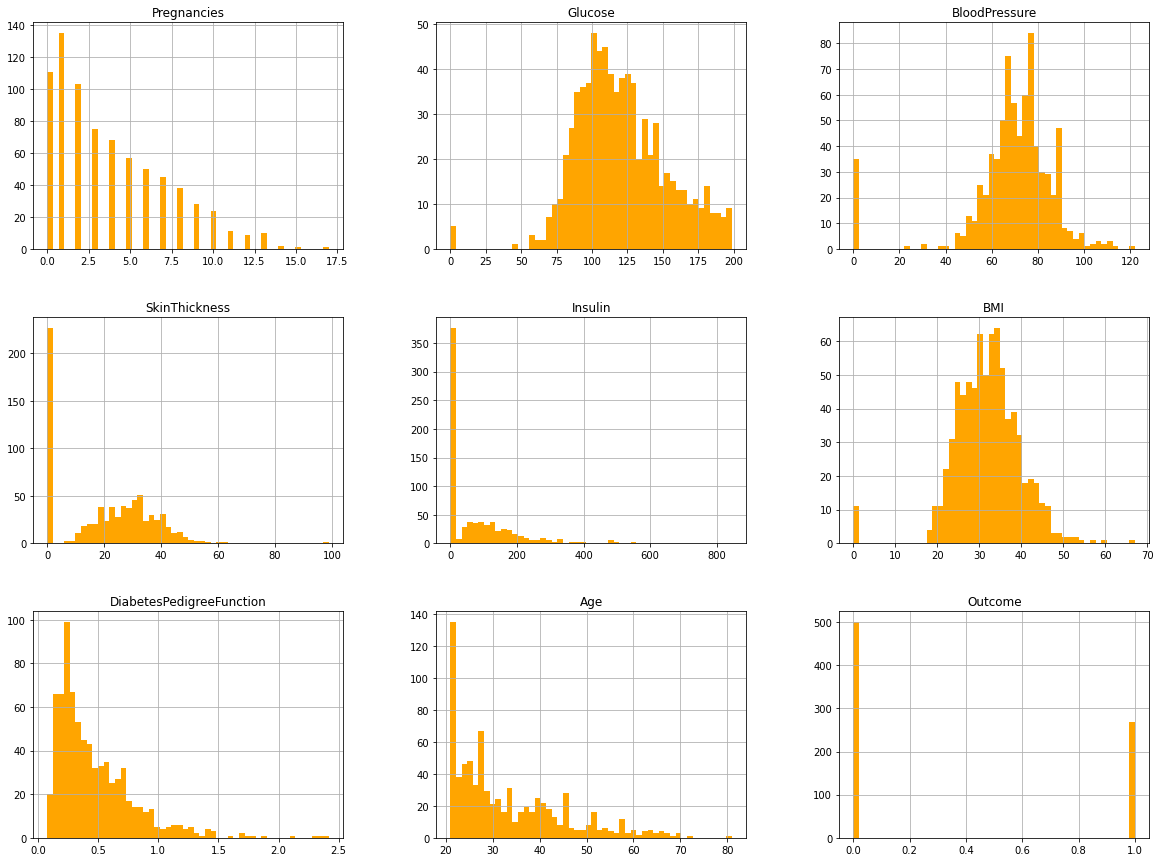

In [11]:
df.hist(bins=50, figsize=(20,15), color='orange')
plt.show()

<AxesSubplot:xlabel='Glucose'>

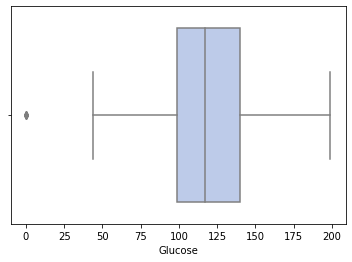

In [12]:
sns.boxplot(x=df['Glucose'], color='#B6C9F0')

<AxesSubplot:xlabel='BloodPressure'>

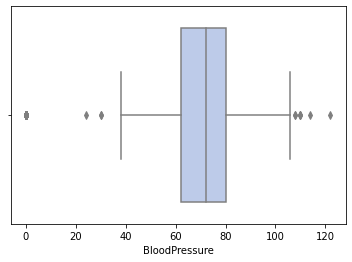

In [13]:
sns.boxplot(x=df['BloodPressure'],color='#B6C9F0')

<AxesSubplot:xlabel='Insulin'>

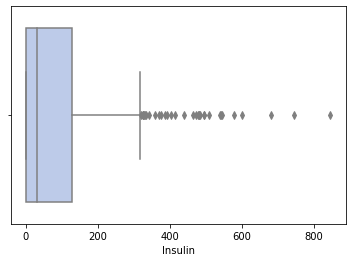

In [14]:
sns.boxplot(x=df['Insulin'], color='#B6C9F0')

<AxesSubplot:xlabel='SkinThickness'>

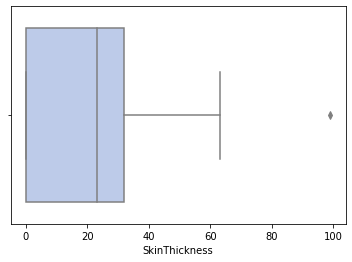

In [15]:
sns.boxplot(x=df['SkinThickness'], color='#B6C9F0')

<AxesSubplot:xlabel='BMI'>

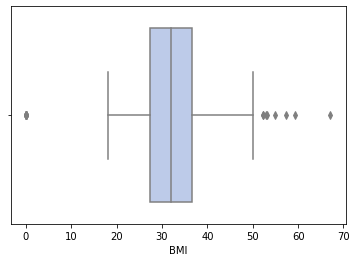

In [16]:
sns.boxplot(x=df['BMI'],color='#B6C9F0')

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

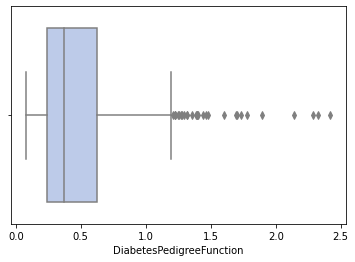

In [17]:
sns.boxplot(x=df['DiabetesPedigreeFunction'], color='#B6C9F0')

<AxesSubplot:xlabel='Age'>

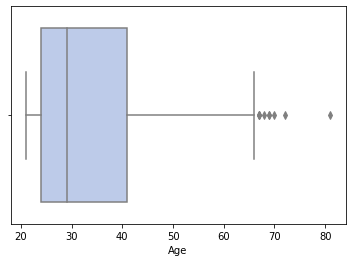

In [18]:
sns.boxplot(x=df['Age'],color='#B6C9F0')

In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
outcol=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']
for i in outcol:
    df[i]=df[i].replace(0,np.mean(sorted(df[i])))

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
df.shape

(619, 9)

<AxesSubplot:xlabel='Glucose'>

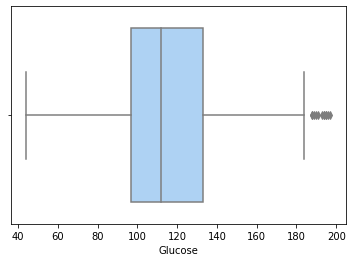

In [23]:
sns.boxplot(x=df['Glucose'] , color = '#A2D2FF')

<AxesSubplot:xlabel='BloodPressure'>

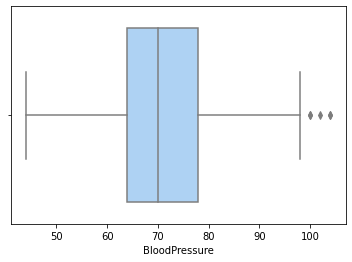

In [24]:
sns.boxplot(x=df['BloodPressure'], color = '#A2D2FF')

<AxesSubplot:xlabel='Insulin'>

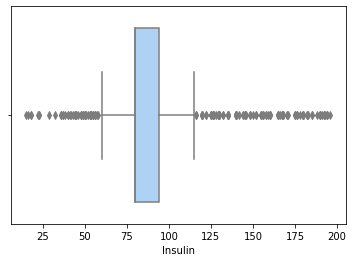

In [25]:
sns.boxplot(x=df['Insulin'], color='#A2D2FF')

<AxesSubplot:xlabel='SkinThickness'>

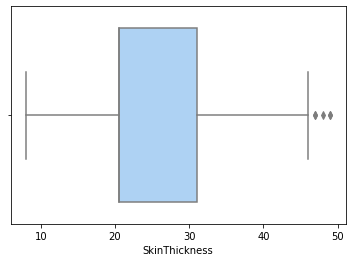

In [26]:
sns.boxplot(x=df[ 'SkinThickness'], color ='#A2D2FF')

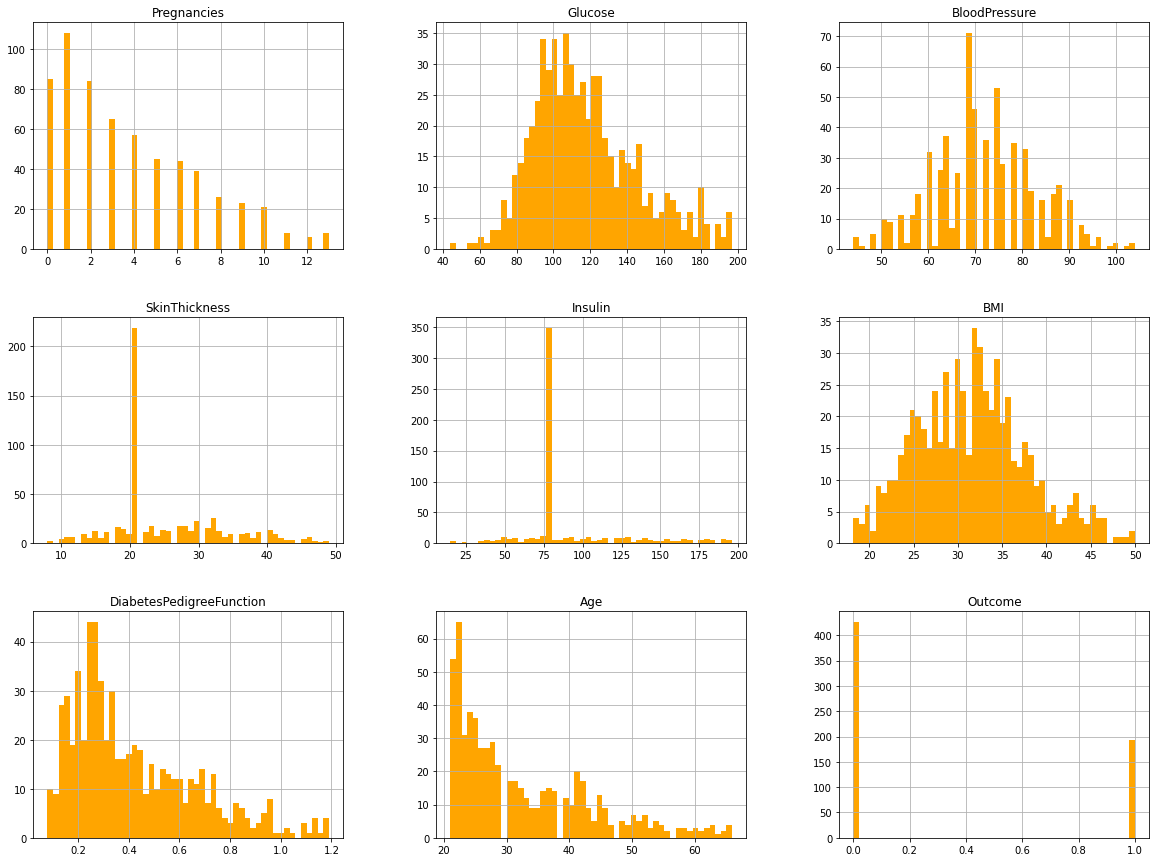

In [27]:
df.hist(bins=50, figsize=(20,15), color = 'orange')
plt.show()

In [28]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']

   jumlah sampel  persentase
0            426        68.8
1            193        31.2


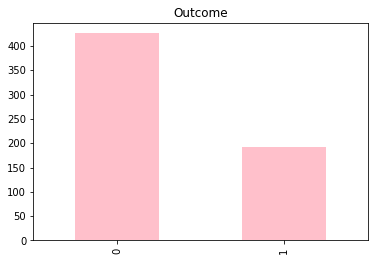

In [30]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature, color= 'pink' );

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

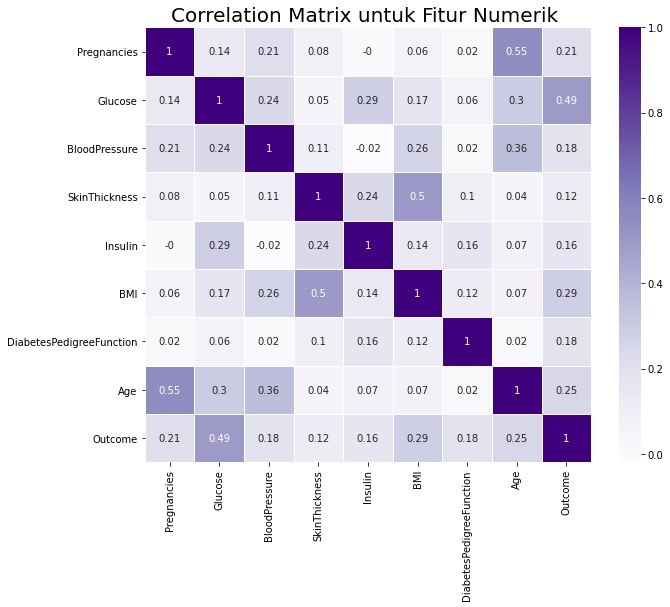

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='Purples', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

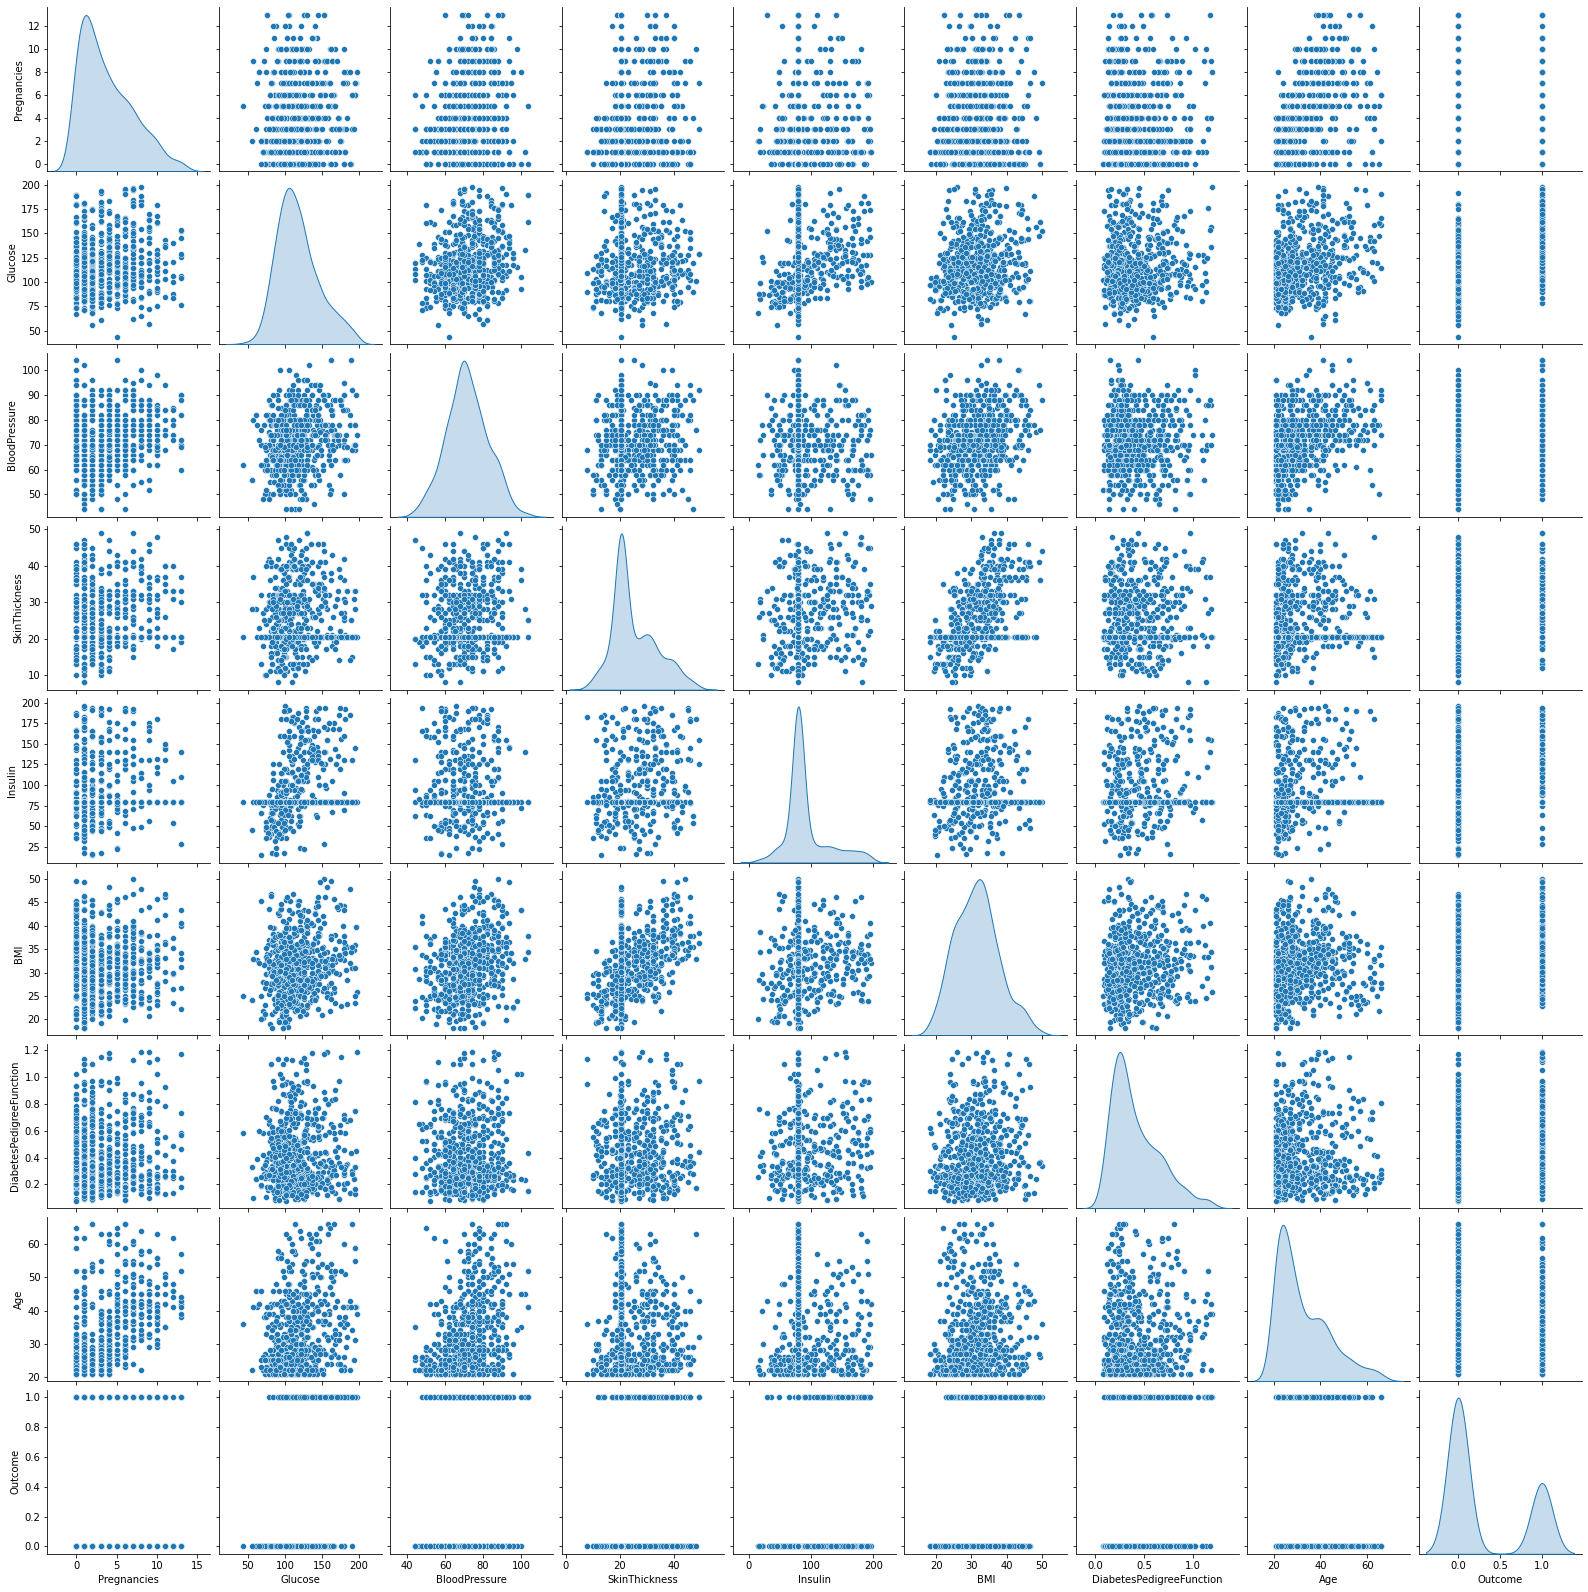

In [32]:
sns.pairplot(df, diag_kind = 'kde')

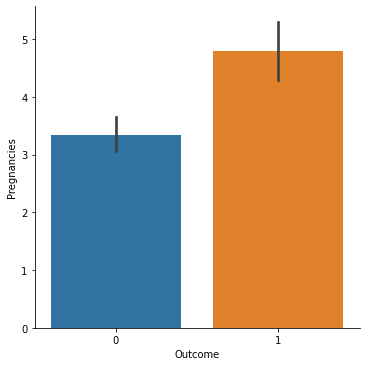

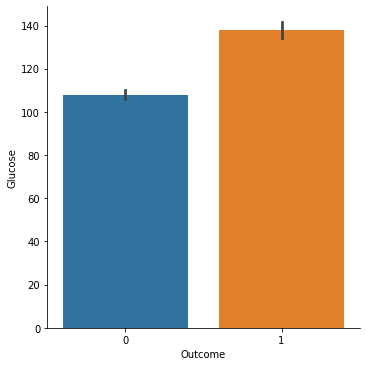

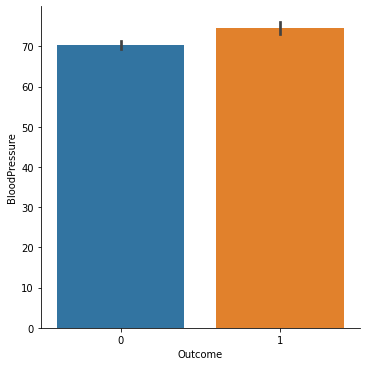

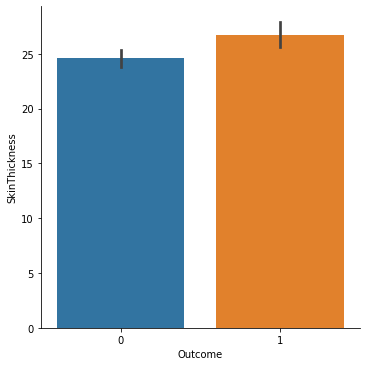

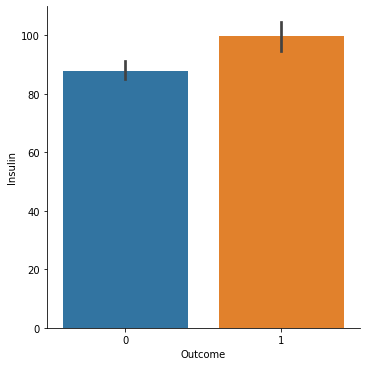

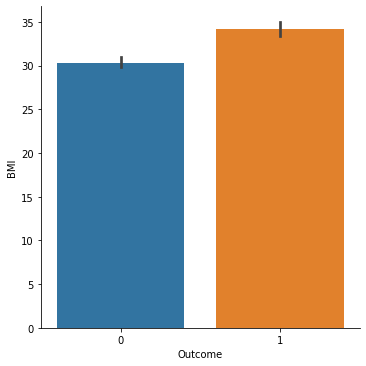

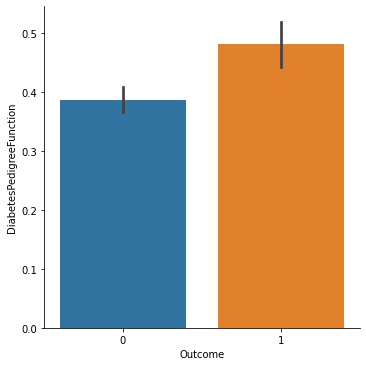

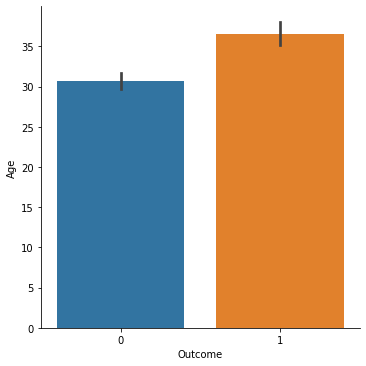

In [33]:
for i,col in enumerate(df.columns[:-1]):
    sns.catplot(x='Outcome', y=col, data=df,kind="bar")
plt.show()

In [34]:
#melakukan pengecekan korelasi dengan nilai rata - rata
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.342723,107.949961,70.283799,24.579030,88.011939,30.349878,0.387185,30.65493
1,4.797927,137.973000,74.583327,26.730516,99.679458,34.203550,0.480762,36.57513


In [35]:
#melakukan pengecekan korelasi variable dengan nilai urutan false
df.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.494754
BMI                         0.286779
Age                         0.249950
Pregnancies                 0.208819
BloodPressure               0.181881
DiabetesPedigreeFunction    0.177168
Insulin                     0.160138
SkinThickness               0.121601
Name: Outcome, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["Outcome"],axis =1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [37]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 619
Total # of sample in train dataset: 433
Total # of sample in test dataset: 186


In [38]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
634,1.916629,-0.915536,-0.882194,-0.586003,-0.365311,-0.906787,-1.017871,-0.127887
219,0.373490,-0.201605,-0.511737,-0.586003,-0.365311,1.008710,-0.631882,0.807500
128,-0.861022,-0.023122,1.525774,-0.167089,1.556643,0.477522,-0.048792,0.713962
301,-0.552394,0.940685,-1.252651,0.921459,1.261867,0.010720,0.029228,-0.689119
261,-0.243766,0.833595,-0.224127,-0.586003,-0.365311,-0.246826,1.421253,-0.502041


In [39]:
X_train[numerical_features].describe().round(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,433.0000,433.0000,433.0000,433.0000,433.0000,433.0000,433.0000,433.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012
min,-1.1696,-2.6290,-2.5492,-2.1023,-2.2754,-2.1462,-1.3587,-1.0633
25%,-0.8610,-0.6657,-0.6970,-0.5860,-0.3653,-0.7297,-0.7304,-0.7827
50%,-0.2438,-0.2016,-0.1413,-0.5860,-0.3653,0.0107,-0.2828,-0.3150
75%,0.6821,0.5480,0.5996,0.6796,0.0533,0.5902,0.5836,0.6204
max,2.8425,2.8326,3.0076,2.8567,3.0010,2.9725,3.1869,3.1460


In [40]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [41]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [42]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [43]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

In [44]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [45]:
## Scalling numerikal fitur agar nilai meannya 0 dan variance nya 1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [46]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,0.000136,0.000152
RF,0.000023,0.000158
Boosting,0.00012,0.000148


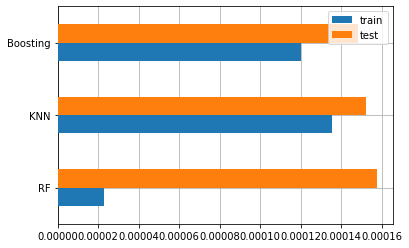

In [47]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [48]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
137,0,0.0,0.1,0.1
351,0,0.4,0.6,0.5
316,0,0.0,0.0,0.1
305,0,0.0,0.2,0.4
737,0,0.1,0.2,0.1


In [49]:
mean2=(0.000148212+0.000157555+0.000152366)/3
mean2

0.000152711

In [50]:
diabetes=df.copy()

In [51]:
diabetes.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.494754
BMI                         0.286779
Age                         0.249950
Pregnancies                 0.208819
BloodPressure               0.181881
DiabetesPedigreeFunction    0.177168
Insulin                     0.160138
SkinThickness               0.121601
Name: Outcome, dtype: float64

In [52]:
S=diabetes.drop(['Outcome'],axis=1)
r=diabetes['Outcome']

In [53]:
Scaler = StandardScaler()
StandardizedData = Scaler.fit_transform(S)
print(StandardizedData)

[[ 0.68261737  1.09175498  0.03430374 ...  0.3291024   0.86092316
   1.59493212]
 [-0.86628347 -1.14945302 -0.51362487 ... -0.79544459 -0.26714798
  -0.1367884 ]
 [ 1.3021777   2.33687054 -0.69626775 ... -1.32558817  1.0448478
  -0.04564521]
 ...
 [ 0.3728372   0.13123727  0.03430374 ... -0.85970442 -0.7003927
  -0.22793158]
 [-0.86628347  0.30911092 -1.06155349 ... -0.2331711  -0.27532241
   1.32150256]
 [-0.86628347 -0.86485518 -0.14833913 ... -0.18497622 -0.4142877
  -0.86593388]]


In [54]:
P = StandardizedData

In [55]:
P_train, P_test, r_train, r_test = train_test_split(P,r,test_size = 0.2, random_state = 2)

In [56]:
print(P.shape)
print(P_train.shape)
print(P_test.shape)

(619, 8)
(495, 8)
(124, 8)


In [57]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler
# model = svm.SVC(kernel='linear')
# model.fit(P_train,r_train)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

In [58]:
KNN = KNeighborsClassifier()
n_neighbors = list(range(15, 30))
z = [1,5]
weights = ['uniform']
metric = ['manhattan']

hyperparameters = dict(n_neighbors=n_neighbors, p=z,weights=weights,metric=metric)

xy = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=xy, scoring='f1',error_score=0)

In [59]:
model = grid_search.fit(P_train,r_train)

In [60]:
print('Best leaf_size:', model.best_estimator_.get_params()['leaf_size'])
print('Best z:', model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 30
Best z: 1
Best n_neighbors: 15


In [61]:
train_pred = model.predict(P_train)
train_pred

array([0.        , 0.        , 0.53333333, 0.4       , 0.        ,
       0.26666667, 0.        , 0.73333333, 0.13333333, 0.26666667,
       0.53333333, 0.26666667, 0.73333333, 0.2       , 0.53333333,
       0.13333333, 0.        , 0.26666667, 0.13333333, 0.13333333,
       0.        , 0.66666667, 0.53333333, 0.66666667, 0.33333333,
       0.33333333, 0.66666667, 0.6       , 0.        , 0.2       ,
       0.4       , 0.        , 0.        , 0.06666667, 0.06666667,
       0.06666667, 0.33333333, 0.53333333, 0.8       , 0.46666667,
       0.4       , 0.33333333, 0.53333333, 0.        , 0.33333333,
       0.6       , 0.6       , 0.13333333, 0.06666667, 0.46666667,
       0.06666667, 0.46666667, 0.        , 0.06666667, 0.        ,
       0.13333333, 0.73333333, 0.46666667, 0.46666667, 0.26666667,
       0.06666667, 0.26666667, 0.33333333, 0.66666667, 0.33333333,
       0.4       , 0.46666667, 0.73333333, 0.8       , 0.        ,
       0.8       , 0.6       , 0.6       , 0.06666667, 0.13333

In [62]:
# Training_score = accuracy_score(train_pred,r_train)
# print("Accuracy Score:",Training_score)

In [63]:
test_pred = model.predict(P_test)
test_pred

array([0.        , 0.33333333, 0.        , 0.06666667, 0.33333333,
       0.53333333, 0.13333333, 0.53333333, 0.26666667, 0.13333333,
       0.46666667, 0.4       , 0.        , 0.        , 0.13333333,
       0.        , 0.46666667, 0.33333333, 0.        , 0.06666667,
       0.33333333, 0.6       , 0.2       , 0.2       , 0.06666667,
       0.8       , 0.46666667, 0.46666667, 0.26666667, 0.6       ,
       0.86666667, 0.33333333, 0.        , 0.46666667, 0.33333333,
       0.33333333, 0.66666667, 0.6       , 0.2       , 0.06666667,
       0.33333333, 0.66666667, 0.4       , 0.2       , 0.4       ,
       0.33333333, 0.73333333, 0.        , 0.53333333, 0.53333333,
       0.        , 0.13333333, 0.53333333, 0.26666667, 0.6       ,
       0.46666667, 0.        , 0.33333333, 0.4       , 0.13333333,
       0.06666667, 0.53333333, 0.86666667, 0.        , 0.13333333,
       0.2       , 0.8       , 0.33333333, 0.13333333, 0.06666667,
       0.        , 0.26666667, 0.2       , 0.        , 0.4    

In [64]:
# Test_score = accuracy_score(test_pred,r_test) 
# print("Accuracy Score:",Test_score)

In [65]:
joblib.dump(model, './content/Diabetes_model.pkl')

['./content/Diabetes_model.pkl']

In [66]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,3.796446,117.310941,71.624363,25.249849,91.649792,31.551427,0.416362,32.500808,0.311793
std,3.230706,28.132574,10.959187,8.202458,33.777507,6.229763,0.244863,10.980621,0.463600
min,0.000000,44.000000,44.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,20.536458,79.799479,27.000000,0.236500,24.000000,0.000000
50%,3.000000,112.000000,70.000000,20.536458,79.799479,31.600000,0.340000,29.000000,0.000000
75%,6.000000,133.000000,78.000000,31.000000,94.000000,35.350000,0.564500,40.000000,1.000000
max,13.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


Prediksi menggunakan data baru

In [68]:
test_data = [13, 197, 104, 49, 196, 50, 1.191, 66]
# test_data = [0, 44, 44, 8, 15, 18.2, 0.078, 21]
test_data = np.array(test_data)

test_data = test_data.reshape(1,-1)
print(test_data)

[[ 13.    197.    104.     49.    196.     50.      1.191  66.   ]]


In [69]:
filePath = './content/Diabetes_model.pkl'
file = open(filePath, "rb")
trained_model = joblib.load(file)

In [70]:
prediction = trained_model.predict(test_data)
print(prediction)

[0.8]


In [71]:
if prediction >= 0.7:
    print('positive')
else:
    print('negative')

positif
